In [1]:
#%matplotlib notebook
%matplotlib inline 

%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np

#import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("../../pycode/")
from magus_util import read_nvprof_trace, parse_nvprof_trace, getruntime, sort_dict_by_val, genNNFeat, testFeat
from magus_contention import *

In [2]:
dedicated_dd = np.load('../dedicated_app_runtime.npy').item()

In [3]:
dedicated_dd

{'cudasdk_BlackScholes': 2416.1,
 'cudasdk_FDTD3d': 3.0,
 'cudasdk_MCEstimatePiInlineP': 1479.6,
 'cudasdk_MCEstimatePiInlineQ': 1471.5,
 'cudasdk_MCEstimatePiP': 1528.3,
 'cudasdk_MCEstimatePiQ': 1546.9,
 'cudasdk_MCSingleAsianOptionP': 1437.6,
 'cudasdk_SobolQRNG': 1639.4,
 'cudasdk_batchCUBLAS': 1807.5,
 'cudasdk_binomialOptions': 25939.8,
 'cudasdk_boxFilterNPP': 1497.7,
 'cudasdk_c++11Cuda': 11.0,
 'cudasdk_concurrentKernels': 1485.0,
 'cudasdk_convolutionFFT2D': 2.0,
 'cudasdk_convolutionSeparable': 2906.1,
 'cudasdk_convolutionTexture': 2195.5,
 'cudasdk_dct8x8': 8.0,
 'cudasdk_dwtHaar1D': 1.0,
 'cudasdk_dxtc': 1477.1,
 'cudasdk_eigenvalues': 2401.7,
 'cudasdk_fastWalshTransform': 4356.6,
 'cudasdk_interval': 2995.2,
 'cudasdk_lineOfSight': 1533.0,
 'cudasdk_matrixMul': 1483.3,
 'cudasdk_mergeSort': 1816.5,
 'cudasdk_quasirandomGenerator': 2133.4,
 'cudasdk_radixSortThrust': 4385.2,
 'cudasdk_reduction': 2171.3,
 'cudasdk_scalarProd': 1521.4,
 'cudasdk_scan': 3620.1,
 'cudasdk_s

### update dedicated exe time

In [4]:
# dedicated_dd['cudasdk_batchCUBLAS'] = 1530.67
# dedicated_dd['cudasdk_boxFilterNPP'] = 1220.33
# dedicated_dd['cudasdk_concurrentKernels'] = 1378.33
# dedicated_dd['cudasdk_dxtc'] = 1321.67
# dedicated_dd['cudasdk_lineOfSight'] = 1400.33
# dedicated_dd['cudasdk_matrixMul'] = 1226.33
# # dedicated_dd['cudasdk_MCEstimatePiInlineP'] = 1337.0
# # dedicated_dd['cudasdk_MCEstimatePiInlineQ'] = 1332.0
# # dedicated_dd['cudasdk_MCEstimatePiP'] = 1301.67
# # dedicated_dd['cudasdk_MCEstimatePiQ'] = 1304.67
# # dedicated_dd['cudasdk_MCSingleAsianOptionP'] = 1161.0


# # dedicated_dd[''] = 
# # dedicated_dd[''] = 
# # dedicated_dd[''] = 
# # dedicated_dd[''] = 

# # ./benchmark_app.sh  FDTD3d  ../apps/devid_cudasdk80/6_Advanced/FDTD3d/
# dedicated_dd['cudasdk_FDTD3d'] = 15071.5

# # ./benchmark_app.sh  c11_cuda  ../apps/devid_cudasdk80/6_Advanced/c++11_cuda/
# dedicated_dd['cudasdk_c++11Cuda'] = 1562.2
dedicated_dd['cudasdk_c11Cuda'] = 933.0


# # ./benchmark_app.sh  convolutionFFT2D  ../apps/devid_cudasdk80/3_Imaging/convolutionFFT2D/
# dedicated_dd['cudasdk_convolutionFFT2D'] = 4803.6

# # ./benchmark_app.sh  dct8x8  ../apps/devid_cudasdk80/3_Imaging/dct8x8/
# dedicated_dd['cudasdk_dct8x8'] = 1729.2

# # ./benchmark_app.sh  dwtHaar1D  ../apps/devid_cudasdk80/3_Imaging/dwtHaar1D/
# dedicated_dd['cudasdk_dwtHaar1D'] = 1409.5


# # ./benchmark_app.sh  2DCONV  ../apps/devid_poly/CUDA/2DCONV/
# dedicated_dd['poly_2dconv'] = 2559.7

# # ./benchmark_app.sh  3DCONV  ../apps/devid_poly/CUDA/3DCONV/
# dedicated_dd['poly_3dconv'] = 2541.5


# #
# dedicated_dd['poly_3mm'] = 3373.9


# dedicated_dd['poly_fdtd2d'] = 31159.1


# dedicated_dd['poly_syr2k'] = 55472.3

# # ./benchmark_app.sh  lev1BFS  ../apps/devid_shoc/src/cuda/level1/bfs/
# dedicated_dd['shoc_lev1BFS'] = 1445.8


# dedicated_dd['shoc_lev1GEMM'] = 1787


# dedicated_dd['shoc_lev1fft'] = 1429.6

# dedicated_dd['shoc_lev1md5hash'] = 1422.7

# dedicated_dd['shoc_lev1reduction'] = 1525.5

# dedicated_dd['shoc_lev1sort'] = 1531.5

dedicated_dd['rodinia_btree'] = 2326.0




In [5]:
target_logs = [
'run2_log_cudasdk_batchCUBLAS',
'run2_log_cudasdk_binomialOptions',
'run2_log_cudasdk_BlackScholes',
'run2_log_cudasdk_boxFilterNPP',
'run2_log_cudasdk_c++11Cuda',
'run2_log_cudasdk_concurrentKernels',
'run2_log_cudasdk_convolutionFFT2D',
'run2_log_cudasdk_convolutionSeparable',
'run2_log_cudasdk_convolutionTexture',
'run2_log_cudasdk_dct8x8',
'run2_log_cudasdk_dwtHaar1D',
'run2_log_cudasdk_dxtc',
'run2_log_cudasdk_eigenvalues',
'run2_log_cudasdk_fastWalshTransform',
'run2_log_cudasdk_FDTD3d',
'run2_log_cudasdk_interval',
'run2_log_cudasdk_lineOfSight',
'run2_log_cudasdk_matrixMul',
'run2_log_cudasdk_MCEstimatePiInlineP',
'run2_log_cudasdk_MCEstimatePiInlineQ',
'run2_log_cudasdk_MCEstimatePiP',
'run2_log_cudasdk_MCEstimatePiQ',
'run2_log_cudasdk_MCSingleAsianOptionP',
'run2_log_cudasdk_mergeSort',
'run2_log_cudasdk_quasirandomGenerator',
'run2_log_cudasdk_radixSortThrust',
'run2_log_cudasdk_reduction',
'run2_log_cudasdk_scalarProd',
'run2_log_cudasdk_scan',
'run2_log_cudasdk_segmentationTreeThrust',
'run2_log_cudasdk_shflscan',
'run2_log_cudasdk_simpleCUBLAS',
'run2_log_cudasdk_simpleCUFFTcallback',
'run2_log_cudasdk_SobolQRNG',
'run2_log_cudasdk_sortingNetworks',
'run2_log_cudasdk_stereoDisparity',
'run2_log_cudasdk_threadFenceReduction',
'run2_log_cudasdk_transpose',
'run2_log_cudasdk_vectorAdd',
'run2_log_lonestar_bh',
'run2_log_lonestar_dmr',
'run2_log_lonestar_mst',
'run2_log_lonestar_sssp',
'run2_log_parboil_bfs',
'run2_log_parboil_cutcp',
'run2_log_parboil_lbm',
'run2_log_parboil_mriq',
'run2_log_parboil_sgemm',
'run2_log_parboil_stencil',
'run2_log_poly_2dconv',
'run2_log_poly_3dconv',
'run2_log_poly_3mm',
'run2_log_poly_atax',
'run2_log_poly_bicg',
'run2_log_poly_correlation',
'run2_log_poly_covariance',
'run2_log_poly_fdtd2d',
'run2_log_poly_gemm',
'run2_log_poly_gesummv',
'run2_log_poly_mvt',
'run2_log_poly_syr2k',
'run2_log_poly_syrk',
'run2_log_rodinia_backprop',
'run2_log_rodinia_b+tree',
'run2_log_rodinia_dwt2d',
'run2_log_rodinia_gaussian',
'run2_log_rodinia_heartwall',
'run2_log_rodinia_hotspot',
'run2_log_rodinia_hybridsort',
'run2_log_rodinia_lavaMD',
'run2_log_rodinia_lud',
'run2_log_rodinia_needle',
'run2_log_rodinia_pathfinder',
'run2_log_shoc_lev1BFS',
'run2_log_shoc_lev1fft',
'run2_log_shoc_lev1GEMM',
'run2_log_shoc_lev1md5hash',
'run2_log_shoc_lev1reduction',
'run2_log_shoc_lev1sort']

In [6]:
target_traces = [
'../similarity/traces/traces_cudasdk_batchCUBLAS.csv',
'../similarity/traces/traces_cudasdk_binomialOptions.csv',
'../similarity/traces/traces_cudasdk_BlackScholes.csv',
'../similarity/traces/traces_cudasdk_boxFilterNPP.csv',
'../similarity/traces/traces_cudasdk_c++11Cuda.csv',
'../similarity/traces/traces_cudasdk_concurrentKernels.csv',
'../similarity/traces/traces_cudasdk_convolutionFFT2D.csv',
'../similarity/traces/traces_cudasdk_convolutionSeparable.csv',
'../similarity/traces/traces_cudasdk_convolutionTexture.csv',
'../similarity/traces/traces_cudasdk_dct8x8.csv',
'../similarity/traces/traces_cudasdk_dwtHaar1D.csv',
'../similarity/traces/traces_cudasdk_dxtc.csv',
'../similarity/traces/traces_cudasdk_eigenvalues.csv',
'../similarity/traces/traces_cudasdk_fastWalshTransform.csv',
'../similarity/traces/traces_cudasdk_FDTD3d.csv',
'../similarity/traces/traces_cudasdk_interval.csv',
'../similarity/traces/traces_cudasdk_lineOfSight.csv',
'../similarity/traces/traces_cudasdk_matrixMul.csv',
'../similarity/traces/traces_cudasdk_MCEstimatePiInlineP.csv',
'../similarity/traces/traces_cudasdk_MCEstimatePiInlineQ.csv',
'../similarity/traces/traces_cudasdk_MCEstimatePiP.csv',
'../similarity/traces/traces_cudasdk_MCEstimatePiQ.csv',
'../similarity/traces/traces_cudasdk_MCSingleAsianOptionP.csv',
'../similarity/traces/traces_cudasdk_mergeSort.csv',
'../similarity/traces/traces_cudasdk_quasirandomGenerator.csv',
'../similarity/traces/traces_cudasdk_radixSortThrust.csv',
'../similarity/traces/traces_cudasdk_reduction.csv',
'../similarity/traces/traces_cudasdk_scalarProd.csv',
'../similarity/traces/traces_cudasdk_scan.csv',
'../similarity/traces/traces_cudasdk_segmentationTreeThrust.csv',
'../similarity/traces/traces_cudasdk_shflscan.csv',
'../similarity/traces/traces_cudasdk_simpleCUBLAS.csv',
'../similarity/traces/traces_cudasdk_simpleCUFFTcallback.csv',
'../similarity/traces/traces_cudasdk_SobolQRNG.csv',
'../similarity/traces/traces_cudasdk_sortingNetworks.csv',
'../similarity/traces/traces_cudasdk_stereoDisparity.csv',
'../similarity/traces/traces_cudasdk_threadFenceReduction.csv',
'../similarity/traces/traces_cudasdk_transpose.csv',
'../similarity/traces/traces_cudasdk_vectorAdd.csv',
'../similarity/traces/traces_lonestar_bh.csv',
'../similarity/traces/traces_lonestar_dmr.csv',
'../similarity/traces/traces_lonestar_mst.csv',
'../similarity/traces/traces_lonestar_sssp.csv',
'../similarity/traces/traces_parboil_bfs.csv',
'../similarity/traces/traces_parboil_cutcp.csv',
'../similarity/traces/traces_parboil_lbm.csv',
'../similarity/traces/traces_parboil_mriq.csv',
'../similarity/traces/traces_parboil_sgemm.csv',
'../similarity/traces/traces_parboil_stencil.csv',
'../similarity/traces/traces_poly_2dconv.csv',
'../similarity/traces/traces_poly_3dconv.csv',
'../similarity/traces/traces_poly_3mm.csv',
'../similarity/traces/traces_poly_atax.csv',
'../similarity/traces/traces_poly_bicg.csv',
'../similarity/traces/traces_poly_correlation.csv',
'../similarity/traces/traces_poly_covariance.csv',
'../similarity/traces/traces_poly_fdtd2d.csv',
'../similarity/traces/traces_poly_gemm.csv',
'../similarity/traces/traces_poly_gesummv.csv',
'../similarity/traces/traces_poly_mvt.csv',
'../similarity/traces/traces_poly_syr2k.csv',
'../similarity/traces/traces_poly_syrk.csv',
'../similarity/traces/traces_rodinia_backprop.csv',
'../similarity/traces/traces_rodinia_b+tree.csv',
'../similarity/traces/traces_rodinia_dwt2d.csv',
'../similarity/traces/traces_rodinia_gaussian.csv',
'../similarity/traces/traces_rodinia_heartwall.csv',
'../similarity/traces/traces_rodinia_hotspot.csv',
'../similarity/traces/traces_rodinia_hybridsort.csv',
'../similarity/traces/traces_rodinia_lavaMD.csv',
'../similarity/traces/traces_rodinia_lud.csv',
'../similarity/traces/traces_rodinia_needle.csv',
'../similarity/traces/traces_rodinia_pathfinder.csv',
'../similarity/traces/traces_shoc_lev1BFS.csv',
'../similarity/traces/traces_shoc_lev1fft.csv',
'../similarity/traces/traces_shoc_lev1GEMM.csv',
'../similarity/traces/traces_shoc_lev1md5hash.csv',
'../similarity/traces/traces_shoc_lev1reduction.csv',
'../similarity/traces/traces_shoc_lev1sort.csv']

In [7]:
print len(target_logs)

79


In [8]:
print len(target_traces)

79


In [9]:
# special cases
# [1]
# [test]cudasdk_MCEstimatePiP:	17282.3;cudasdk_batchCUBLAS:	18016.7
# [test]cudasdk_MCEstimatePiP:	1384.33;cudasdk_binomialOptions:	26192.7

In [10]:
#
# find all the min execution time in the test log
#
import copy
def update_dedicated_runtime(logFile, singleExe_dd):
    dedicated_dd = copy.deepcopy(singleExe_dd)
    with open(logFile) as f:
        lines = f.readlines()
    
    #
    # find the min of  application, and update accordingly
    # 
    for line in lines:
        first6char = line[:6]
        if first6char == "[test]":
            #print line
            dataline = line[6:]
            [app1, app2]= dataline.split(';')
            app1_runtime = float(app1.split(':')[1])
            app2_runtime = float(app2.split(':')[1])

            app1_name = app1.split(':')[0]
            app2_name = app2.split(':')[0]

            if dedicated_dd[app1_name] > app1_runtime:
                dedicated_dd[app1_name] = app1_runtime

            if dedicated_dd[app2_name] > app2_runtime:
                dedicated_dd[app2_name] = app2_runtime
    
    return dedicated_dd


#
# update dedicated runtime
#
for logFile in target_logs:
    print "working on %s" %  logFile
    
    dedicated_dd = update_dedicated_runtime(logFile, dedicated_dd)
    
    #break

working on run2_log_cudasdk_batchCUBLAS
working on run2_log_cudasdk_binomialOptions
working on run2_log_cudasdk_BlackScholes
working on run2_log_cudasdk_boxFilterNPP
working on run2_log_cudasdk_c++11Cuda
working on run2_log_cudasdk_concurrentKernels
working on run2_log_cudasdk_convolutionFFT2D
working on run2_log_cudasdk_convolutionSeparable
working on run2_log_cudasdk_convolutionTexture
working on run2_log_cudasdk_dct8x8
working on run2_log_cudasdk_dwtHaar1D
working on run2_log_cudasdk_dxtc
working on run2_log_cudasdk_eigenvalues
working on run2_log_cudasdk_fastWalshTransform
working on run2_log_cudasdk_FDTD3d
working on run2_log_cudasdk_interval
working on run2_log_cudasdk_lineOfSight
working on run2_log_cudasdk_matrixMul
working on run2_log_cudasdk_MCEstimatePiInlineP
working on run2_log_cudasdk_MCEstimatePiInlineQ
working on run2_log_cudasdk_MCEstimatePiP
working on run2_log_cudasdk_MCEstimatePiQ
working on run2_log_cudasdk_MCSingleAsianOptionP
working on run2_log_cudasdk_mergeSort

In [11]:
dedicated_dd

{'cudasdk_BlackScholes': 1805.0,
 'cudasdk_FDTD3d': 3.0,
 'cudasdk_MCEstimatePiInlineP': 746.667,
 'cudasdk_MCEstimatePiInlineQ': 832.333,
 'cudasdk_MCEstimatePiP': 884.333,
 'cudasdk_MCEstimatePiQ': 912.667,
 'cudasdk_MCSingleAsianOptionP': 799.0,
 'cudasdk_SobolQRNG': 961.333,
 'cudasdk_batchCUBLAS': 1106.33,
 'cudasdk_binomialOptions': 25165.0,
 'cudasdk_boxFilterNPP': 819.333,
 'cudasdk_c++11Cuda': 11.0,
 'cudasdk_c11Cuda': 933.0,
 'cudasdk_concurrentKernels': 777.0,
 'cudasdk_convolutionFFT2D': 2.0,
 'cudasdk_convolutionSeparable': 2199.0,
 'cudasdk_convolutionTexture': 1494.67,
 'cudasdk_dct8x8': 8.0,
 'cudasdk_dwtHaar1D': 1.0,
 'cudasdk_dxtc': 797.0,
 'cudasdk_eigenvalues': 1723.0,
 'cudasdk_fastWalshTransform': 3664.0,
 'cudasdk_interval': 2289.67,
 'cudasdk_lineOfSight': 905.333,
 'cudasdk_matrixMul': 786.0,
 'cudasdk_mergeSort': 1155.67,
 'cudasdk_quasirandomGenerator': 1498.67,
 'cudasdk_radixSortThrust': 3654.0,
 'cudasdk_reduction': 1469.33,
 'cudasdk_scalarProd': 844.667,

In [12]:
np.save("dedicated_app_runtime_update2.npy",dedicated_dd)

### obtain the speedups for each application

In [13]:
# 20% slowdown
QoS = 0.8


def get_twoapp_speedup(logFile, dedicated_dd):
    
    app_speedup ={}
    total_good = 0
    
    with open(logFile) as f:
        lines = f.readlines()
    
    app_speedup_list = []
    for line in lines:
        #print line
        first6char = line[:6]
        if first6char == "[test]":
            #print line
            dataline = line[6:]
            [app1, app2]= dataline.split(';')
            app1_runtime = float(app1.split(':')[1])
            app2_runtime = float(app2.split(':')[1])
            #print app1_runtime
            #print app2_runtime

            app1_name = app1.split(':')[0]
            app2_name = app2.split(':')[0]
            test_name = app1_name + "+" + app2_name
            #print test_name

            app1_spd = dedicated_dd[app1_name] / app1_runtime
            app2_spd = dedicated_dd[app2_name] / app2_runtime

            #print app1_spd, app2_spd
            #test_perf_dd[test_name] = [app1_spd, app2_spd]
            #app_speedup[app2_name] = [app1_spd, app2_spd]
            
            avg_speedup = (app1_spd + app2_spd) * 0.5
            GOODRUN = 1
            
            #if app1_spd < QoS or app2_spd < QoS or avg_speedup < QoS:
            if avg_speedup < QoS:
                GOODRUN = 0

            if GOODRUN == 1:
                total_good = total_good + 1
                
            app_speedup[app2_name] = [app1_spd, app2_spd, GOODRUN]
            
    return app1_name, app_speedup, total_good

In [23]:
X_features = []
Y = []
Y_label = []

good_Threshould = 10 # if app1_total_good < 10

In [24]:
print "appName, app_totalGood, appDur, gpuDur, apiNum,transCalls, kernelCalls, kerns_time_ratio, trans_time_ratio, avgKernsTime, avgTransTime, avgApiGap, MinKernT, MaxKernT, MeanKernT, StdKernT, MedianKernT"


for logFile, appTrace_csv in zip(target_logs, target_traces):
    #print "working on %s : %s" %  (logFile, appTrace_csv)
    
    app1_name, app1_speedup_dd, app1_total_good = get_twoapp_speedup(logFile, dedicated_dd)
#     #print app1_name, app1_total_good
    
    df_trace = read_nvprof_trace(appTrace_csv)
    appTraceList = parse_nvprof_trace(df_trace)
    
    appDur, gpuDur, apiNum,transCalls, kernelCalls, kerns_time_ratio, trans_time_ratio, avgKernsTime, avgTransTime, avgApiGap, MinKernT, MaxKernT, MeanKernT, StdKernT, MedianKernT = testFeat(appTraceList)
    #print app1_name, app1_total_good
    #print "appName, app_totalGood, appDur, gpuDur, apiNum,transCalls, kernelCalls, kerns_time_ratio, trans_time_ratio, avgKernsTime, avgTransTime, avgApiGap, MinKernT, MaxKernT, MeanKernT, StdKernT, MedianKernT"
    
    X_features.append([appDur, gpuDur, apiNum,transCalls, kernelCalls, kerns_time_ratio, trans_time_ratio, avgKernsTime, avgTransTime, avgApiGap, MinKernT, MaxKernT, MeanKernT, StdKernT, MedianKernT])
    if app1_total_good < good_Threshould:
        Y.append(0) # apps that vulnerable to interference
    else:
        Y.append(1)
        
    Y_label.append(app1_name)
    
        
    print("{}, {}, {:.1f}, {:.1f}, {:.0f}, {:.0f}, {:.0f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(\
                                                                        app1_name,
                                                                        app1_total_good,
                                                                        appDur,
                                                                        gpuDur,
                                                                        apiNum,
                                                                        transCalls,
                                                                        kernelCalls,
                                                                        kerns_time_ratio,
                                                                        trans_time_ratio,
                                                                        avgKernsTime, 
                                                                        avgTransTime,
                                                                        avgApiGap,
                                                                        MinKernT, 
                                                                        MaxKernT,
                                                                        MeanKernT,
                                                                        StdKernT,
                                                                        MedianKernT       
                                                         ))
       
    
#     if app1_total_good < 5:
#         print app1_name, app1_total_good
    
    #break


appName, app_totalGood, appDur, gpuDur, apiNum,transCalls, kernelCalls, kerns_time_ratio, trans_time_ratio, avgKernsTime, avgTransTime, avgApiGap, MinKernT, MaxKernT, MeanKernT, StdKernT, MedianKernT
cudasdk_batchCUBLAS, 0, 1246.9, 70.2, 237, 193, 44, 0.023, 0.602, 0.037, 0.219, 0.112, 0.012, 0.155, 0.037, 0.036, 0.023
cudasdk_binomialOptions, 24, 638.1, 1.4, 3, 2, 1, 0.992, 0.005, 1.340, 0.003, 0.002, 1.340, 1.340, 1.340, 0.000, 1.340
cudasdk_BlackScholes, 55, 1122.0, 316.1, 517, 5, 512, 0.364, 0.632, 0.225, 39.959, 0.002, 0.223, 0.226, 0.225, 0.000, 0.225
cudasdk_boxFilterNPP, 0, 788.9, 1.3, 3, 2, 1, 0.010, 0.986, 0.012, 0.646, 0.003, 0.012, 0.012, 0.012, 0.000, 0.012
cudasdk_c11Cuda, 33, 783.2, 154.6, 5, 3, 2, 0.946, 0.054, 73.164, 2.762, 0.006, 0.501, 145.826, 73.164, 72.662, 73.164
cudasdk_concurrentKernels, 0, 609.6, 10.8, 10, 1, 9, 7.956, 0.000, 9.541, 0.001, -8.342, 0.002, 10.733, 9.541, 3.372, 10.733
cudasdk_convolutionFFT2D, 0, 3411.1, 2160.0, 57, 15, 42, 0.002, 0.113, 0.095,

rodinia_needle, 0, 792.0, 141.6, 385, 3, 382, 0.092, 0.894, 0.034, 42.185, 0.005, 0.005, 0.054, 0.034, 0.023, 0.053
rodinia_pathfinder, 3, 898.4, 104.2, 13, 3, 10, 0.004, 0.996, 0.046, 34.568, -0.001, 0.042, 0.047, 0.046, 0.002, 0.046
shoc_lev1BFS, 0, 620.4, 7.5, 322, 222, 100, 0.228, 0.019, 0.017, 0.001, 0.018, 0.008, 0.024, 0.017, 0.007, 0.019
shoc_lev1fft, 0, 633.9, 15.9, 86, 26, 60, 0.040, 0.652, 0.011, 0.399, 0.058, 0.003, 0.022, 0.011, 0.008, 0.007
shoc_lev1GEMM, 0, 1160.6, 36.8, 246, 46, 200, 0.114, 0.468, 0.021, 0.375, 0.063, 0.017, 0.025, 0.021, 0.003, 0.023
shoc_lev1md5hash, 0, 552.6, 13.6, 70, 60, 10, 0.416, 0.004, 0.566, 0.001, 0.114, 0.564, 0.568, 0.566, 0.001, 0.565
shoc_lev1reduction, 0, 666.3, 90.0, 5160, 40, 5120, 0.173, 0.598, 0.003, 1.345, 0.004, 0.003, 0.004, 0.003, 0.000, 0.003
shoc_lev1sort, 0, 746.7, 112.4, 520, 40, 480, 0.025, 0.918, 0.006, 2.578, 0.012, 0.002, 0.019, 0.006, 0.006, 0.003


In [25]:
for logFile, appTrace_csv in zip(target_logs, target_traces):
    #print "working on %s : %s" %  (logFile, appTrace_csv)
    
    app1_name, app1_speedup_dd, app1_total_good = get_twoapp_speedup(logFile, dedicated_dd)
#     #print app1_name, app1_total_good
       
    if app1_total_good < 10:
        print app1_name, app1_total_good
    
    #break


cudasdk_batchCUBLAS 0
cudasdk_boxFilterNPP 0
cudasdk_concurrentKernels 0
cudasdk_convolutionFFT2D 0
cudasdk_dct8x8 0
cudasdk_dwtHaar1D 0
cudasdk_dxtc 0
cudasdk_eigenvalues 3
cudasdk_FDTD3d 0
cudasdk_lineOfSight 0
cudasdk_matrixMul 0
cudasdk_MCEstimatePiInlineP 0
cudasdk_MCEstimatePiInlineQ 0
cudasdk_MCEstimatePiP 0
cudasdk_MCEstimatePiQ 0
cudasdk_MCSingleAsianOptionP 0
cudasdk_mergeSort 0
cudasdk_quasirandomGenerator 4
cudasdk_radixSortThrust 7
cudasdk_reduction 4
cudasdk_scalarProd 0
cudasdk_scan 6
cudasdk_segmentationTreeThrust 7
cudasdk_shflscan 0
cudasdk_simpleCUFFTcallback 0
cudasdk_SobolQRNG 0
cudasdk_transpose 0
cudasdk_vectorAdd 0
lonestar_bh 3
lonestar_mst 0
lonestar_sssp 3
parboil_bfs 2
parboil_cutcp 4
parboil_lbm 9
parboil_mriq 0
parboil_sgemm 0
parboil_stencil 0
poly_2dconv 0
poly_3dconv 0
poly_3mm 0
poly_atax 0
poly_bicg 0
poly_fdtd2d 0
poly_gemm 6
poly_gesummv 4
poly_mvt 4
poly_syr2k 0
rodinia_backprop 0
rodinia_btree 8
rodinia_dwt2d 0
rodinia_gaussian 0
rodinia_heartwall

In [26]:
for logFile, appTrace_csv in zip(target_logs, target_traces):
    #print "working on %s : %s" %  (logFile, appTrace_csv)
    
    app1_name, app1_speedup_dd, app1_total_good = get_twoapp_speedup(logFile, dedicated_dd)
#     #print app1_name, app1_total_good
       
    if app1_total_good >= 10:
        print app1_name, app1_total_good
    
    #break


cudasdk_binomialOptions 24
cudasdk_BlackScholes 55
cudasdk_c11Cuda 33
cudasdk_convolutionSeparable 60
cudasdk_convolutionTexture 52
cudasdk_fastWalshTransform 61
cudasdk_interval 10
cudasdk_simpleCUBLAS 38
cudasdk_sortingNetworks 17
cudasdk_stereoDisparity 32
cudasdk_threadFenceReduction 23
lonestar_dmr 15
poly_correlation 23
poly_covariance 22
poly_syrk 13


# apply decision tree

In [36]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

/home/leiming/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
Y_label[:5]

['cudasdk_batchCUBLAS',
 'cudasdk_binomialOptions',
 'cudasdk_BlackScholes',
 'cudasdk_boxFilterNPP',
 'cudasdk_c11Cuda']

In [33]:
Y[:5]

[0, 1, 1, 0, 1]

* For the input data: X_features, Y, Y_label  (list)

In [38]:
X = np.array(X_features)
Y = np.array(Y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [43]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(55, 15)
(55,)
(24, 15)
(24,)


In [52]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_leaf=2)

clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(X_test)
print y_pred

print "Accuracy is ", accuracy_score(y_test,y_pred)*100

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
Accuracy is  83.3333333333


### export tree to a file

In [56]:
from sklearn import tree
import graphviz 
#tree.export_graphviz(clf_gini, out_file='clf_gini.png')
dot_data = tree.export_graphviz(clf_gini, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("clf_gini") 

'clf_gini.pdf'

In [63]:
Feature_Name = ['appDur', 'gpuDur', 'apiNum','transCalls', 'kernelCalls', 'kerns_time_ratio', 
                'trans_time_ratio', 'avgKernsTime', 'avgTransTime', 'avgApiGap', 
                'MinKernT', 'MaxKernT', 'MeanKernT', 'StdKernT', 'MedianKernT']

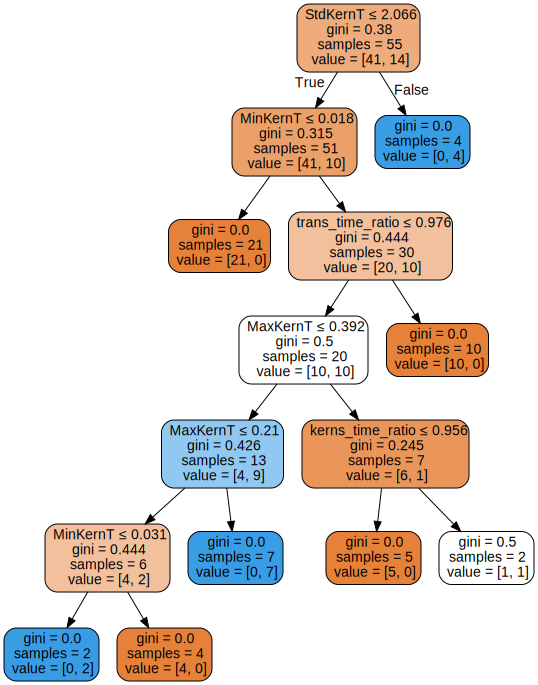

In [64]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                         feature_names=Feature_Name,  
                         #class_names=y,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

### use entropy for tree

In [65]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=2)

clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)
print y_pred

print "Accuracy is ", accuracy_score(y_test,y_pred)*100

[0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]
Accuracy is  70.8333333333


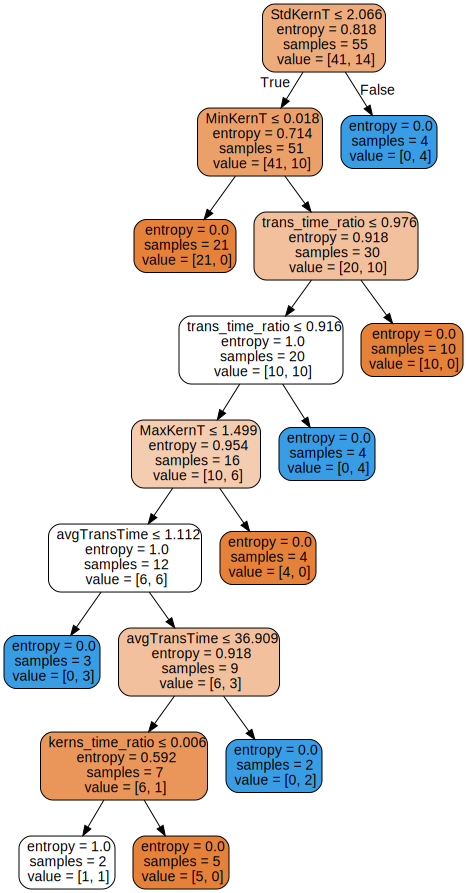

In [66]:
dot_data_entropy = tree.export_graphviz(clf_entropy, out_file=None, 
                         feature_names=Feature_Name,  
                         #class_names=y,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph_entropy = graphviz.Source(dot_data_entropy) 
graph_entropy

## run K-fold

In [98]:
X = np.array(X_features)
Y = np.array(Y)

In [99]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)  #  1/5 for testing

kf.get_n_splits(X)

5

In [115]:
k_num = 1
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    #================#
    # run decision tree
    #================#
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_leaf=4)
    clf_gini.fit(X_train, y_train)

    y_pred = clf_gini.predict(X_test)
    print y_pred

    print "Accuracy is ", accuracy_score(y_test,y_pred)*100
    
    outFile = "kfold_gini_k" + str(k_num)
    #print outFile
    
    #================#
    # output the tree figure
    #================#
    dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                         feature_names=Feature_Name,  
                         filled=True, rounded=True,  
                         special_characters=True) 
    graph = graphviz.Source(dot_data) 
    graph.render(outFile) 


    k_num = k_num + 1

    
#     print X_train.shape

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Accuracy is  62.5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy is  93.75
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Accuracy is  81.25
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
Accuracy is  62.5
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Accuracy is  93.3333333333
